In [1]:
import sys
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

sys.path.append("../")
from src import soporte_limpieza as sp_lim

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.float_format', lambda x: '%.2f' % x)

path_ficheros_salida = '../datos/output/'
fichero = 'datos-limpios-2013-2021.csv'

df = pd.read_csv(path_ficheros_salida + fichero, sep = ';', index_col = 0)

convertimos la fecha, ya que viene como string

In [2]:
df = sp_lim.l_limpieza_conversion_fecha(df)

In [3]:
df.head(1)

,CODIGO_ORGANIZACION_SUPERIOR,NOMBRE_ORGANIZACION_SUPERIOR,CODIGO_DE_ORGANO,NOMBRE_DEL_ORGANO,CODIGO_DE_UNIDAD_GESTORA,NOMBRE_UNIDAD_GESTORA,CATEGORIA_ECONOMICA,ORIGEN_INGRESO,TIPO_INGRESO,DEPARTAMENTO,VALOR_PREVISTO_ACTUALIZADO,VALOR_LANZADO,VALOR_REALIZADO,PORCENTAJE_REALIZADO,FECHA_LANZAMIENTO,ANIO_EJERCICIO
0,63000,Advocacia-geral da união,63000,Advocacia-geral da união - unidades com víncul...,110060,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.divida ativa nao tributaria de outras rec,0.00,0.00,1297.13,0.00,2013-12-31,0


In [4]:
df.dtypes

CODIGO_ORGANIZACION_SUPERIOR             int64
NOMBRE_ORGANIZACION_SUPERIOR            object
CODIGO_DE_ORGANO                         int64
NOMBRE_DEL_ORGANO                       object
CODIGO_DE_UNIDAD_GESTORA                 int64
NOMBRE_UNIDAD_GESTORA                   object
CATEGORIA_ECONOMICA                     object
ORIGEN_INGRESO                          object
TIPO_INGRESO                            object
DEPARTAMENTO                            object
VALOR_PREVISTO_ACTUALIZADO             float64
VALOR_LANZADO                          float64
VALOR_REALIZADO                        float64
PORCENTAJE_REALIZADO                   float64
FECHA_LANZAMIENTO               datetime64[ns]
ANIO_EJERCICIO                           int64
dtype: object

In [5]:
df.describe(include = "object").T

,count,unique,top,freq
NOMBRE_ORGANIZACION_SUPERIOR,1015597,25,Ministério da educação,358074
NOMBRE_DEL_ORGANO,1025237,287,Ministério da economia - unidades com vínculo ...,119666
NOMBRE_UNIDAD_GESTORA,1025528,356,Setorial orcamentaria e financeira / me,108407
CATEGORIA_ECONOMICA,1026142,5,Receitas correntes,961374
ORIGEN_INGRESO,1026142,15,Outras receitas correntes,310590
TIPO_INGRESO,1026142,63,Serviços administrativos e comerciais gerais,269353
DEPARTAMENTO,1026142,1883,Serv.administrat.e comerciais gerais-princ.,154410


In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
CODIGO_ORGANIZACION_SUPERIOR,1026142.00,31723.08,0.00,25000.00,26000.00,39000.00,81000.00,11042.83
CODIGO_DE_ORGANO,1026142.00,31404.44,0.00,25201.00,26298.00,36000.00,91214.00,10418.39
CODIGO_DE_UNIDAD_GESTORA,1026142.00,231242.23,0.00,154003.00,170013.00,250088.00,913001.00,144644.46
VALOR_PREVISTO_ACTUALIZADO,974827.00,28662758.04,-214773743.00,0.00,0.00,0.00,1603521711208.00,3479199391.97
VALOR_LANZADO,999723.00,5277607.07,-148347267246.91,0.00,0.00,0.00,357160677863.97,817153079.86
VALOR_REALIZADO,986724.00,24990147.63,-156285934188.03,260.91,3028.75,40952.27,771117711060.95,1418140899.63
PORCENTAJE_REALIZADO,1002008.00,82.21,-114552.00,0.00,0.00,0.00,72363772.00,72342.36
FECHA_LANZAMIENTO,1002467,2018-09-20 04:04:29.177538048,2013-12-31 00:00:00,2017-03-30 00:00:00,2018-08-29 00:00:00,2020-02-12 00:00:00,2021-12-03 00:00:00,NaN
ANIO_EJERCICIO,1026142.00,1513.69,0.00,2013.00,2017.00,2019.00,2021.00,873.91


# objetivo
Desviaciones entre lo previsto y lo recaudado: Determinar en qué categorías económicas o tipos de ingresos las diferencias son más pronunciadas.

Evolución temporal de la recaudación: Identificar cómo han cambiado las previsiones y recaudaciones año a año, y si existen patrones temporales, como meses específicos donde hay mayores discrepancias.

Rendimiento por órgano y unidad gestora: Evaluar qué órganos o unidades gestoras son más eficientes en términos de alcanzar las metas de recaudación y cuáles presentan consistentemente una baja ejecución.

##### Distribución de Ingresos por Categoría Económica:

1.  Analizar las categorías de ingresos más significativas y su participación en los ingresos totales.

In [7]:
suma_total = df['VALOR_REALIZADO'].sum()
df_categorias_ingresos = df.groupby('CATEGORIA_ECONOMICA')['VALOR_REALIZADO'].sum().reset_index()
df_categorias_ingresos["%"] = np.round(df_categorias_ingresos['VALOR_REALIZADO'] / suma_total * 100, 2)
df_categorias = df_categorias_ingresos.sort_values("%",ascending=False)
display(df_categorias)

,CATEGORIA_ECONOMICA,VALOR_REALIZADO,%
0,Receitas correntes,12025075808832.70,48.77
2,Receitas de capital,12004146145893.74,48.68
4,Sem informação,327166482053.52,1.33
1,Receitas correntes - intra-orçamentárias,280578723547.83,1.14
3,Receitas de capital - intra-orçamentárias,21411268074.28,0.09


2.  Calcular la diferencia promedio entre ingresos previstos y realizados por cada categoría.

In [8]:
df_categorias_ingresos_promedio = df.groupby(['CATEGORIA_ECONOMICA'])[['VALOR_PREVISTO_ACTUALIZADO', 'VALOR_REALIZADO' ]].mean()
df_categorias_ingresos_promedio['DIFERENCIA_PROMEDIO'] = np.round(df_categorias_ingresos_promedio['VALOR_REALIZADO'] - df_categorias_ingresos_promedio['VALOR_PREVISTO_ACTUALIZADO'])
df_categorias_ingresos_promedio = df_categorias_ingresos_promedio.reset_index()
display(df_categorias_ingresos_promedio)

,CATEGORIA_ECONOMICA,VALOR_PREVISTO_ACTUALIZADO,VALOR_REALIZADO,DIFERENCIA_PROMEDIO
0,Receitas correntes,14393521.40,13007717.84,-1385804.00
1,Receitas correntes - intra-orçamentárias,17789884.95,18337280.15,547395.00
2,Receitas de capital,480576002.17,423516304.89,-57059697.00
3,Receitas de capital - intra-orçamentárias,125679203.92,243309864.48,117630661.00
4,Sem informação,55649357.27,17652232.76,-37997125.00


2.A  Rendimiento organo

In [9]:
df_temp_2a = df
df_temp_2a['ANIO_LANZAMIENTO'] = pd.to_datetime(df_temp_2a['FECHA_LANZAMIENTO']).dt.year

df_organo_ingresos_promedio = df_temp_2a.groupby(['NOMBRE_DEL_ORGANO'])[['VALOR_PREVISTO_ACTUALIZADO', 'VALOR_REALIZADO' ]].mean()
df_organo_ingresos_promedio['DIFERENCIA_PROMEDIO'] = np.round(df_organo_ingresos_promedio['VALOR_REALIZADO'] - df_organo_ingresos_promedio['VALOR_PREVISTO_ACTUALIZADO'])
df_organo_ingresos_promedio = df_organo_ingresos_promedio.reset_index()
#df_organo_ingresos_promedio['ANIO_LANZAMIENTO'] = df_organo_ingresos_promedio['ANIO_LANZAMIENTO'].astype(int)
df_organo_ingresos_promedio = df_organo_ingresos_promedio.nsmallest(13, 'DIFERENCIA_PROMEDIO')
df_organo_ingresos_promedio.head(1)

,NOMBRE_DEL_ORGANO,VALOR_PREVISTO_ACTUALIZADO,VALOR_REALIZADO,DIFERENCIA_PROMEDIO
218,Reserva de contingência,346800478.79,0.00,-346800479.00


##### Análisis Temporal:

1.  Evaluar las tendencias a lo largo del tiempo, por ejemplo, cómo cambian los ingresos realizados de un mes a otro o de un año a otro.
    

In [10]:
df_temp = df
df_temp['ANIO_LANZAMIENTO'] = pd.to_datetime(df_temp['FECHA_LANZAMIENTO']).dt.year
df_ingresos_tiempo = df_temp.groupby(['ANIO_LANZAMIENTO','CATEGORIA_ECONOMICA'])[['VALOR_REALIZADO']].sum().reset_index()
df_ingresos_tiempo['ANIO_LANZAMIENTO'] = df_ingresos_tiempo['ANIO_LANZAMIENTO'].astype(int)
df_ingresos_tiempo.head(1)

,ANIO_LANZAMIENTO,CATEGORIA_ECONOMICA,VALOR_REALIZADO
0,2013,Receitas correntes,915357670881.61


In [11]:
df_temp_pre = df
df_temp_pre['ANIO_LANZAMIENTO'] = pd.to_datetime(df_temp_pre['FECHA_LANZAMIENTO']).dt.year
df_ingresos_tiempo_pre = df_temp_pre.groupby(['ANIO_LANZAMIENTO','CATEGORIA_ECONOMICA'])[['VALOR_PREVISTO_ACTUALIZADO']].sum().reset_index()
df_ingresos_tiempo_pre['ANIO_LANZAMIENTO'] = df_ingresos_tiempo_pre['ANIO_LANZAMIENTO'].astype(int)
df_ingresos_tiempo_pre.head(1)

,ANIO_LANZAMIENTO,CATEGORIA_ECONOMICA,VALOR_PREVISTO_ACTUALIZADO
0,2013,Receitas correntes,1173983421282.04


2.  Identificación de Discrepancias:
    Investigar las categorías con mayor diferencia entre lo previsto y lo realizado, identificando patrones en la subejecución o sobre ejecución.

In [12]:
df_temp_dis = df
df_temp_dis['ANIO_LANZAMIENTO'] = pd.to_datetime(df_temp_dis['FECHA_LANZAMIENTO']).dt.year
df_categorias_ingresos_promedio_anios = df_temp_dis.groupby(['ANIO_LANZAMIENTO','CATEGORIA_ECONOMICA'])[['VALOR_PREVISTO_ACTUALIZADO', 'VALOR_REALIZADO' ]].mean()
df_categorias_ingresos_promedio_anios['DIFERENCIA_PROMEDIO'] = np.round(df_categorias_ingresos_promedio_anios['VALOR_REALIZADO'] - df_categorias_ingresos_promedio_anios['VALOR_PREVISTO_ACTUALIZADO'])
df_categorias_ingresos_promedio_anios = df_categorias_ingresos_promedio_anios.reset_index()
df_categorias_ingresos_promedio_anios['ANIO_LANZAMIENTO'] = df_categorias_ingresos_promedio_anios['ANIO_LANZAMIENTO'].astype(int)
df_categorias_ingresos_promedio_anios = df_categorias_ingresos_promedio_anios.reset_index()

df_categorias_ingresos_promedio_anios.sample(1)


,index,ANIO_LANZAMIENTO,CATEGORIA_ECONOMICA,VALOR_PREVISTO_ACTUALIZADO,VALOR_REALIZADO,DIFERENCIA_PROMEDIO
18,18,2016,Sem informação,340486.20,13054019.47,12713533.00


## Fase 4: Visualización de Datos

1. **Gráficos de Barras y Líneas:**

   - Crear gráficos que muestren la comparación entre ingresos previstos, lanzados y realizados para cada categoría.

   - Graficar la evolución temporal de los ingresos realizados y previstos.

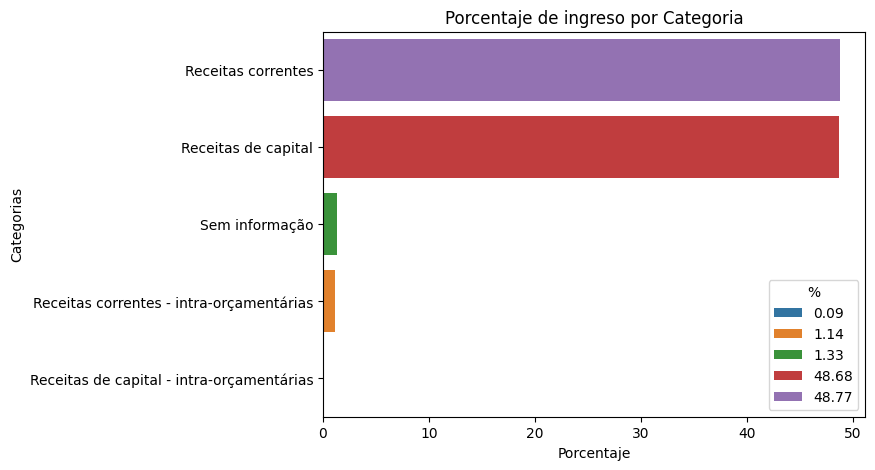

In [13]:
plt.figure(figsize = (7,5))

sns.barplot(y="CATEGORIA_ECONOMICA", 
            hue="%",
            x="%",
            data=df_categorias,
            palette="tab10",
        )

plt.title("Porcentaje de ingreso por Categoria")
plt.xlabel("Porcentaje")
plt.ylabel("Categorias")
plt.xticks(rotation=0)
plt.yticks()
plt.show()

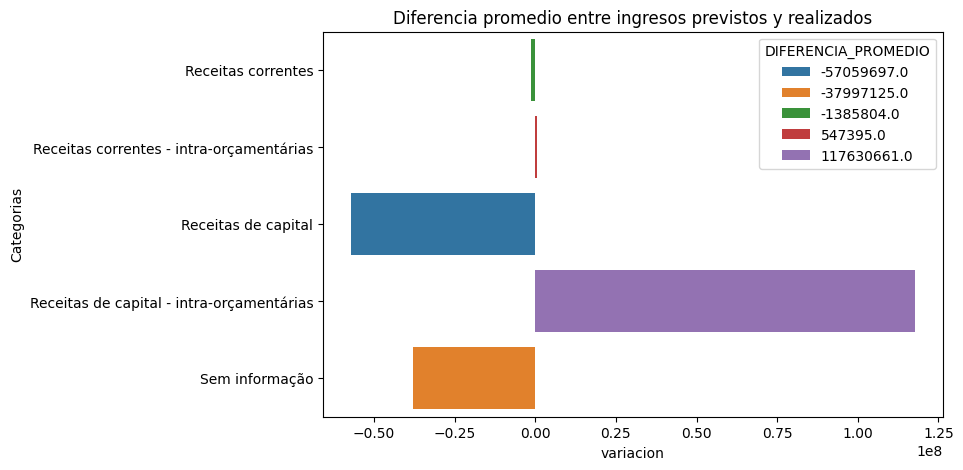

In [14]:
plt.figure(figsize = (8,5))

sns.barplot(y="CATEGORIA_ECONOMICA", 
            hue="DIFERENCIA_PROMEDIO",
            x="DIFERENCIA_PROMEDIO",
            data=df_categorias_ingresos_promedio,
            palette="tab10",
        )

plt.title("Diferencia promedio entre ingresos previstos y realizados")
plt.xlabel("variacion")
plt.ylabel("Categorias")
plt.xticks(rotation=0)
plt.yticks()
plt.show()

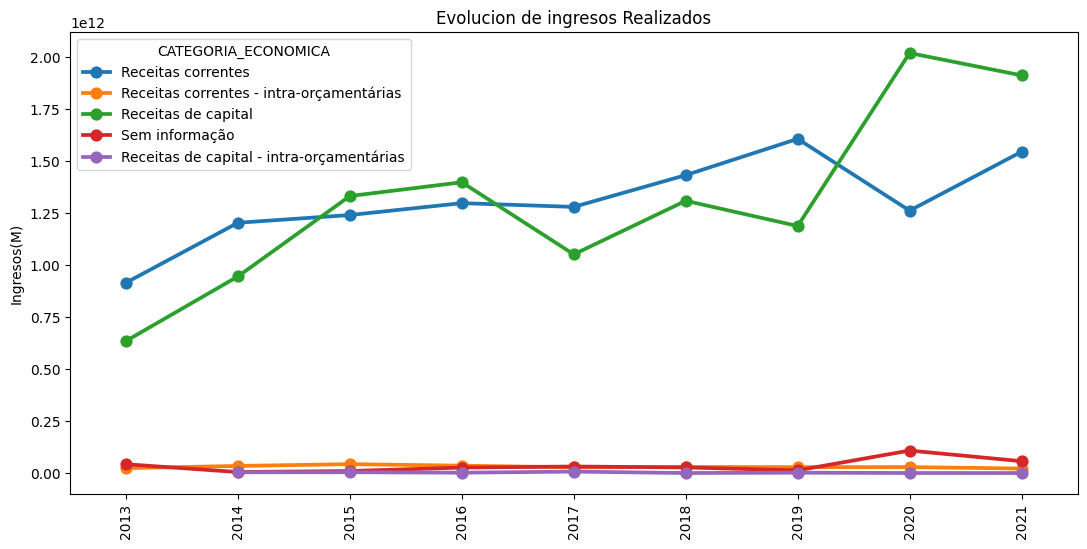

In [15]:
plt.figure(figsize = (13,6))

sns.pointplot(
            x="ANIO_LANZAMIENTO",
            y="VALOR_REALIZADO",
            data=df_ingresos_tiempo,
            palette="tab10",
            hue="CATEGORIA_ECONOMICA",
        )

plt.title("Evolucion de ingresos Realizados")
plt.xlabel("")
plt.ylabel("Ingresos(M)")
plt.xticks(rotation=90)
plt.show()

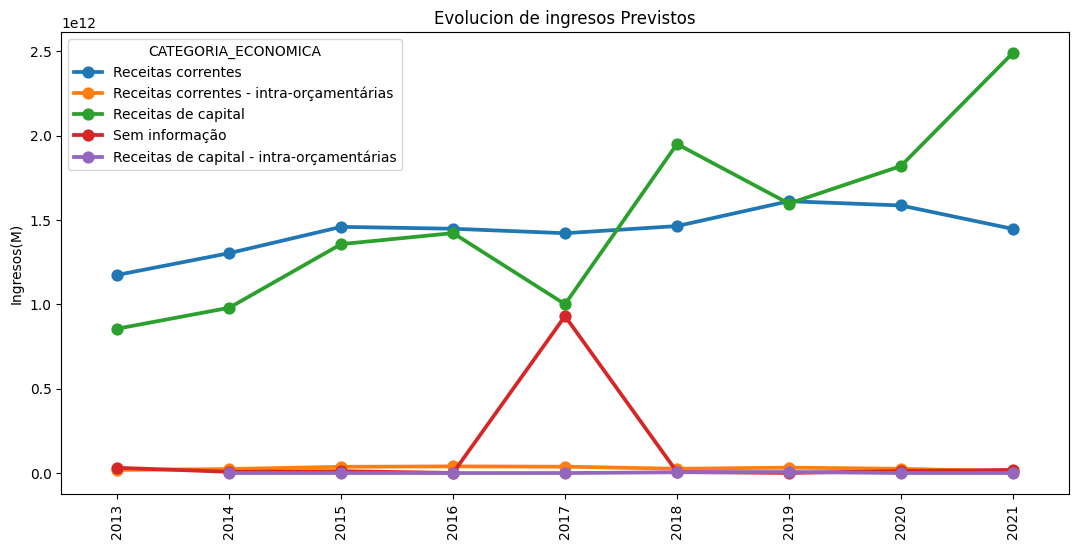

In [16]:
plt.figure(figsize = (13,6))

sns.pointplot(
            x="ANIO_LANZAMIENTO",
            y="VALOR_PREVISTO_ACTUALIZADO",
            data=df_ingresos_tiempo_pre,
            palette="tab10",
            hue="CATEGORIA_ECONOMICA",
        )

plt.title("Evolucion de ingresos Previstos")
plt.xlabel("")
plt.ylabel("Ingresos(M)")
plt.xticks(rotation=90)
plt.show()

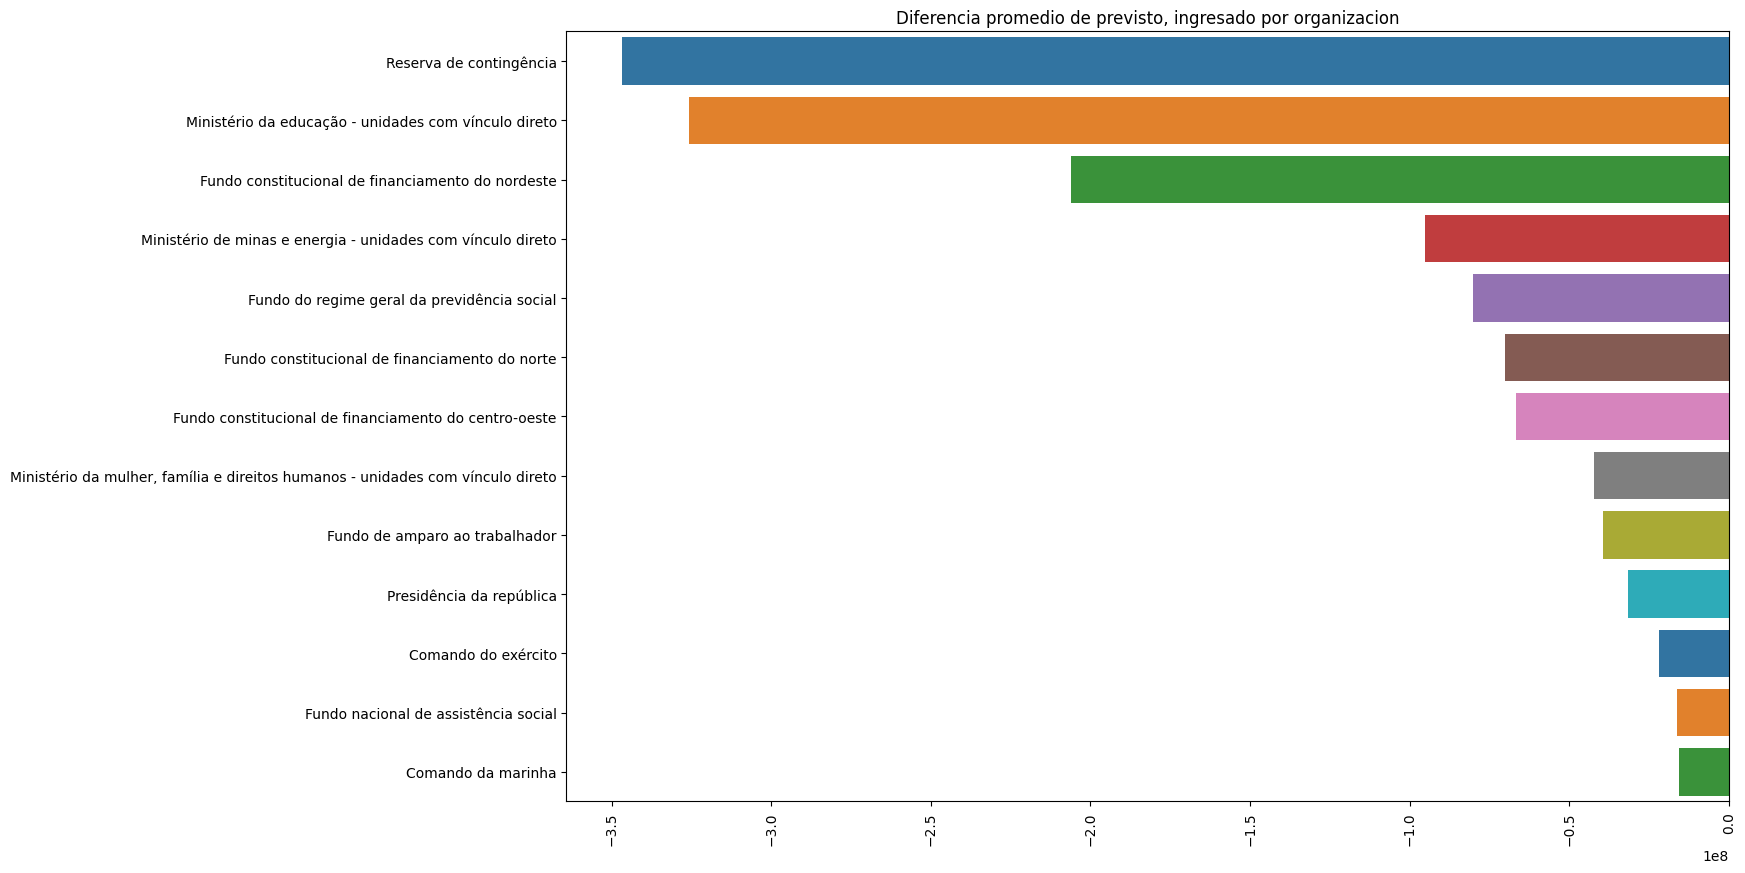

In [17]:
plt.figure(figsize = (15,10))

sns.barplot(
            x="DIFERENCIA_PROMEDIO",
            y="NOMBRE_DEL_ORGANO", 
            data=df_organo_ingresos_promedio,
            palette="tab10",
            hue="NOMBRE_DEL_ORGANO",
        )

plt.title("Diferencia promedio de previsto, ingresado por organizacion")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

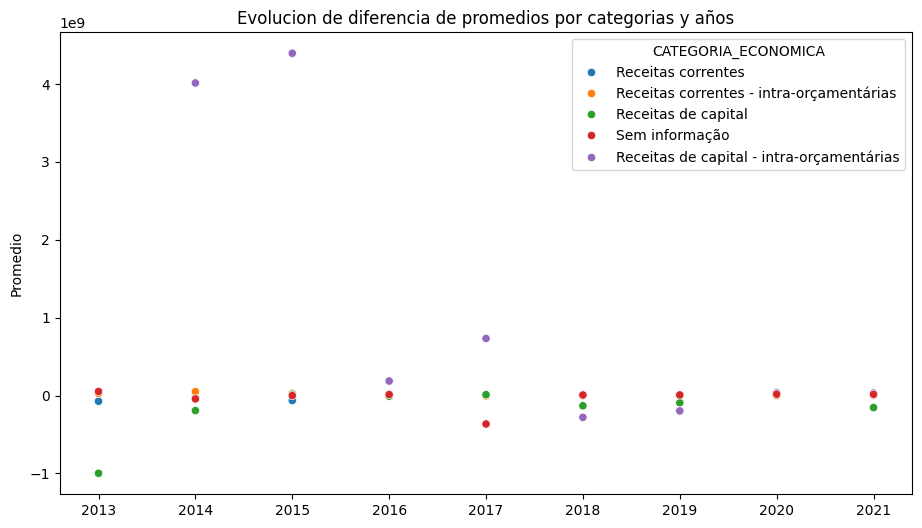

In [18]:
plt.figure(figsize = (11,6))

sns.scatterplot(
            x="ANIO_LANZAMIENTO",
            y="DIFERENCIA_PROMEDIO",
            data=df_categorias_ingresos_promedio_anios,
            palette="tab10",
            hue="CATEGORIA_ECONOMICA",
        )

plt.title("Evolucion de diferencia de promedios por categorias y años")
plt.xlabel("")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.show()